# Visualize Time results

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import copy

In [23]:
test_path = "ORB_SLAM_TEST/"
files = os.listdir(test_path)
files = [file for file in files if file[-3:]!='csv' and "ipynb" not in file]
#files = sorted([file for file in files if 'RGBD' in file and 'gfs' in file])
#files.remove(None)
print(files)

['rgbd_dataset_freiburg1_plant', 'rgbd_dataset_freiburg1_xyz', 'rgbd_dataset_freiburg1_desk2', 'rgbd_dataset_freiburg1_desk', 'rgbd_dataset_freiburg1_360', 'rgbd_dataset_freiburg1_room']


In [24]:
# find the names for gfs and no gfs
# select certain dataset here
dataset_head = 'rgbd_dataset_freiburg1'

#badgfs_names = sorted([name for name in res_names if 'csv' in name and '_badgfs' in name])

In [456]:
def cal_mean(dataset_chosen_dir,name_list,long_len = 1000):
    data_sample = pd.read_csv(dataset_chosen_dir + name_list[0])
    data_sum_all = np.zeros((0,data_sample.shape[1],long_len))
    
    
    for k,name in enumerate(name_list):
        data = pd.read_csv(dataset_chosen_dir + name)
        if data.shape[0] == 0:
            print(name)
            continue
        data_sum = []
    
        # Do the summation transform of original data
        for i in range(data.shape[1]):
            new_sum = data.iloc[:,0].copy()
            for j in range(i):
                new_sum += data.iloc[:,j+1]
            data_sum += [list(new_sum)]   

        #broadcast to longer list
        data_sum = broad_longer(np.array(data_sum))
        
        data_sum_all = np.append(data_sum_all,np.resize(data_sum,(1,data_sum.shape[0],data_sum.shape[1])),axis = 0)

    # Calculate the mean of data
    #print(data_sum_all.shape)
    data_sum_mean = np.mean(data_sum_all,axis = 0)
    
    return data_sum_mean,data_sample.columns

# broadcast to longer list function
def broad_longer(data_sum,long_len = 1000):
    data_extend_mean = np.zeros((data_sum.shape[0],long_len))
    data_extend_std = np.zeros((data_sum.shape[0],long_len))
    for i in range(data_sum.shape[0]):
        for j in range(long_len):
            index_trans = j/long_len * (data_sum.shape[1]-1)
            low_index = math.floor(index_trans)
            high_index = math.ceil(index_trans)
            #print(j,low_index,high_index)

            if low_index == index_trans or high_index == index_trans:
                data_extend_mean[i][j] = data_sum[i][int(index_trans)]
            else:
                data_extend_mean[i][j] = (data_sum[i][low_index] + data_sum[i][high_index])/2
    return data_extend_mean


## GFS test

In [487]:
#Change the dataset name here
dataset_tail = 'room'

dataset_name = dataset_head + "_" + dataset_tail

dataset_chosen_dir = test_path + dataset_name +"/"
res_names = os.listdir(dataset_chosen_dir)

In [488]:
gfs_names = sorted([name for name in res_names if 'csv' in name and '_gfs' in name and 'time' in name])
nogfs_names = sorted([name for name in res_names if 'csv' in name and '_nogfs' in name and 'mih' not in name])

In [489]:
# read a data sample for further extending operation
name = gfs_names[0]
data_sample = pd.read_csv(dataset_chosen_dir + name)

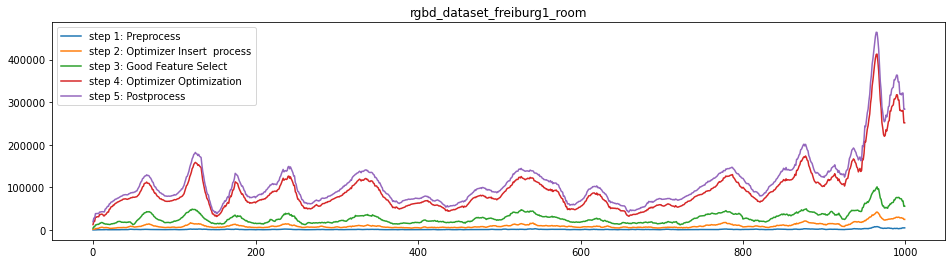

In [490]:
data_mean_nogfs,name_lists = cal_mean(dataset_chosen_dir,gfs_names)

# Plot data result
plt.figure(figsize = (16,4))
for i,data in enumerate(data_mean_nogfs):
    plt.plot(data,label = name_lists[i])

plt.title(dataset_name)   
plt.legend()
plt.show()


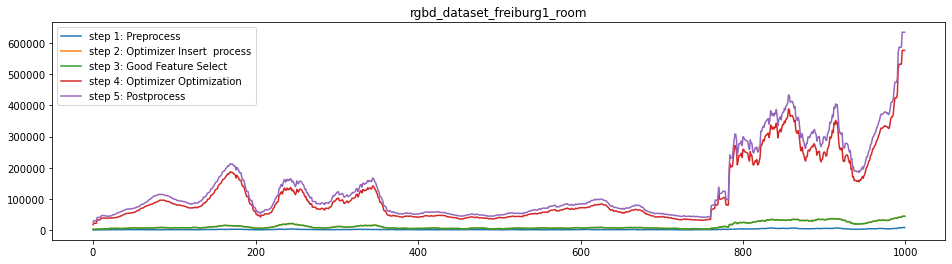

In [491]:
data_mean_nogfs,name_lists = cal_mean(dataset_chosen_dir,nogfs_names)

# Plot data result
plt.figure(figsize = (16,4))
for i,data in enumerate(data_mean_nogfs):
    plt.plot(data,label = name_lists[i])

plt.title(dataset_name)   
plt.legend()
plt.show()

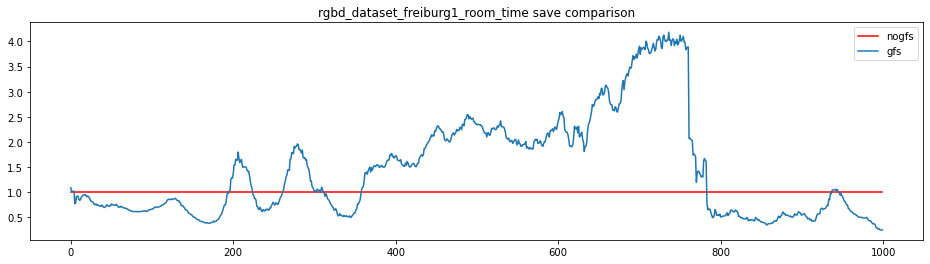

In [492]:
# Find the comparison result of data
error_gfs_cmp = data_mean_gfs / data_mean_nogfs
# Plot data result
plt.figure(figsize = (16,4))
plt.plot(range(len(error_gfs_cmp[0])),np.ones((len(error_gfs_cmp[0]),1)),color='r',label='nogfs')

plt.plot(error_gfs_cmp[-1],label='gfs')

plt.title(dataset_name+"_time save comparison")    
plt.legend()
plt.savefig('test_pics/'+dataset_name+"_time_res_ratio_gfs.jpg")
plt.show()

In [198]:
# calculate the mean and std of bad gfs
'''
long_len = 1000
data_sum_all = np.zeros((len(badgfs_names),data_sample.shape[1],long_len))

for k,name in enumerate(badgfs_names):
    data = pd.read_csv(dataset_chosen_dir + name)
    data_sum = []
    name_lists = data.columns
    
    # Do the summation transform of original data
    for i in range(data.shape[1]):
        new_sum = data.iloc[:,0].copy()
        for j in range(i):
            new_sum += data.iloc[:,j+1]
        data_sum += [list(new_sum)]   
    
    #broadcast to longer list
    data_sum = broad_longer(np.array(data_sum))
    data_sum_all[k] = data_sum

# Calculate the mean of data
data_sum_mean_badgfs = np.mean(data_sum_all,axis = 0)

# Plot data result
plt.figure(figsize = (16,4))
for i,data in enumerate(data_sum_mean_nogfs):
    plt.plot(data,label = name_lists[i])

plt.title(dataset_name)    
plt.legend()
‘‘‘

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-198-88c7c17c691a>, line 32)

## MIH test

In [552]:
#Change the dataset name here
dataset_head = ''
dataset_tail = 'room_roaming'

dataset_name = dataset_head + dataset_tail

dataset_chosen_dir = test_path + dataset_name +"/"
res_names = os.listdir(dataset_chosen_dir)

In [544]:
dataset_head = 'rgbd_dataset_freiburg1'
dataset_tail = '360'

dataset_name = dataset_head + "_" + dataset_tail

dataset_chosen_dir = test_path + dataset_name +"/"
res_names = os.listdir(dataset_chosen_dir)

In [553]:
mih_names = sorted([name for name in res_names if 'csv' in name and 'mih' in name and 'time' in name and '_' in name])
multicount_name_dict = {'nomih':[],'mih4':[],'mih8':[],'mih11':[],'mih16':[],'mih32':[]}

In [554]:
for name in mih_names:
    multicount_name = name.split('_')[2]
    multicount_name_dict[multicount_name] += [name]

In [555]:
multicount_name_dict

{'nomih': ['RGBD_nogfs_nomih_blocksize10_0_time.csv',
  'RGBD_nogfs_nomih_blocksize10_1_time.csv',
  'RGBD_nogfs_nomih_blocksize10_2_time.csv',
  'RGBD_nogfs_nomih_blocksize10_3_time.csv',
  'RGBD_nogfs_nomih_blocksize10_4_time.csv',
  'RGBD_nogfs_nomih_blocksize10_5_time.csv',
  'RGBD_nogfs_nomih_blocksize10_6_time.csv',
  'RGBD_nogfs_nomih_blocksize10_7_time.csv',
  'RGBD_nogfs_nomih_blocksize10_8_time.csv',
  'RGBD_nogfs_nomih_blocksize10_9_time.csv'],
 'mih4': ['RGBD_nogfs_mih4_blocksize10_0_time.csv',
  'RGBD_nogfs_mih4_blocksize10_1_time.csv',
  'RGBD_nogfs_mih4_blocksize10_2_time.csv',
  'RGBD_nogfs_mih4_blocksize10_3_time.csv',
  'RGBD_nogfs_mih4_blocksize10_4_time.csv',
  'RGBD_nogfs_mih4_blocksize10_5_time.csv',
  'RGBD_nogfs_mih4_blocksize10_6_time.csv',
  'RGBD_nogfs_mih4_blocksize10_7_time.csv',
  'RGBD_nogfs_mih4_blocksize10_8_time.csv',
  'RGBD_nogfs_mih4_blocksize10_9_time.csv'],
 'mih8': ['RGBD_nogfs_mih8_blocksize10_0_time.csv',
  'RGBD_nogfs_mih8_blocksize10_1_time.c

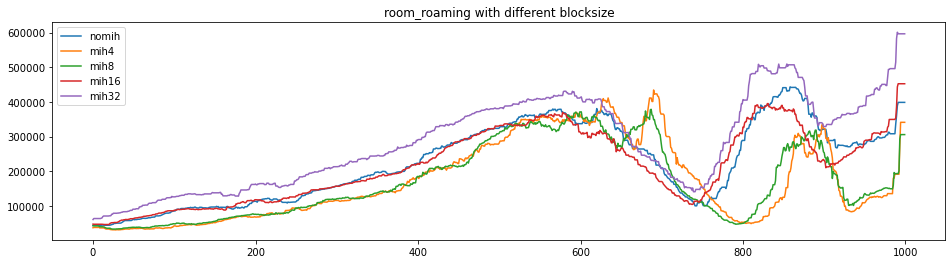

In [556]:
plt.figure(figsize = (16,4))
for key in multicount_name_dict.keys():
    name_list = multicount_name_dict[key]
    
    data_mean,name_lists = cal_mean(dataset_chosen_dir,name_list)
    
    plt.plot(data_mean[-1],label = key)

plt.title(dataset_name + " with different blocksize")
plt.legend()
#plt.savefig('test_pics/'+dataset_name+"_time_res_MIH.jpg")
plt.show()

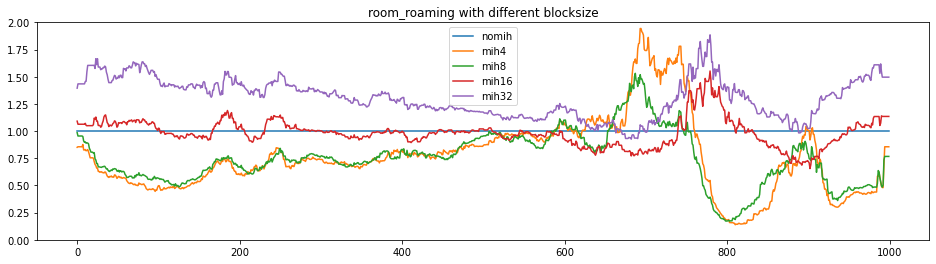

In [557]:
plt.figure(figsize = (16,4))
data_mean_list = []
for key in multicount_name_dict.keys():
    name_list = multicount_name_dict[key]
    
    data_mean,name_lists = cal_mean(dataset_chosen_dir,name_list)
    data_mean_list += [data_mean]
    
    plt.plot(data_mean[-1]/data_mean_list[0][-1],label = key)

plt.title(dataset_name + " with different blocksize")
plt.legend()
plt.ylim([0,2])
plt.savefig('test_pics/'+dataset_name+"_time_res_ratio_MIH.jpg")
plt.show()

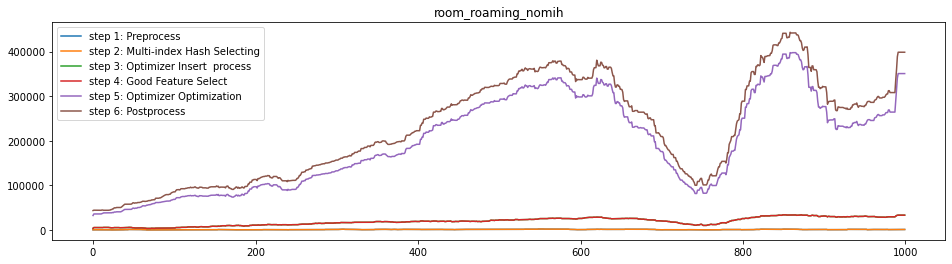

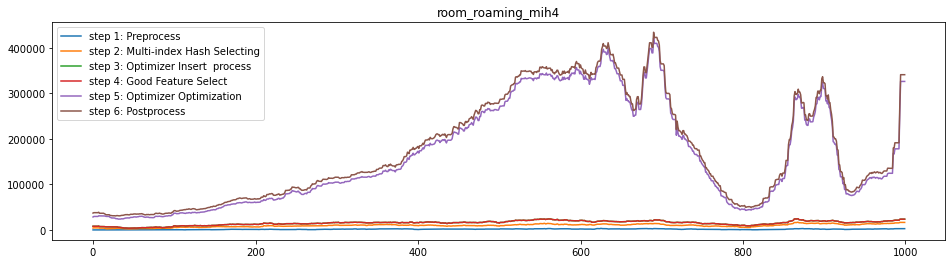

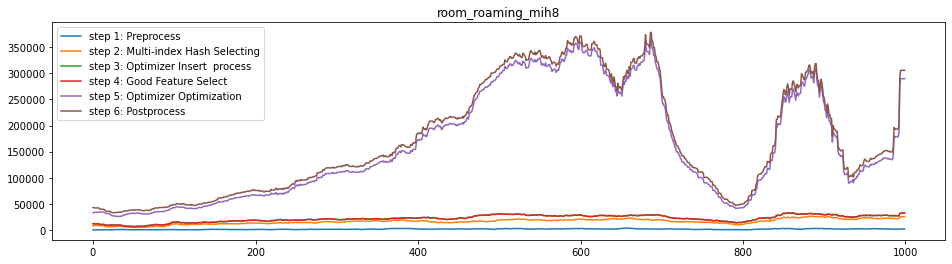

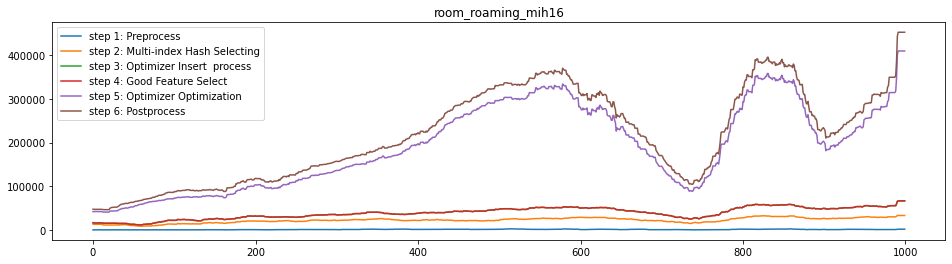

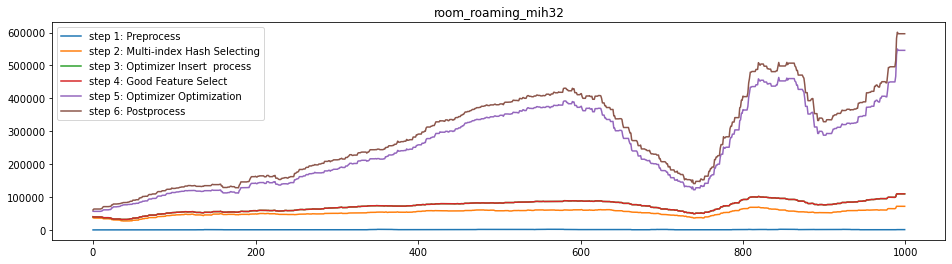

In [558]:
for key in multicount_name_dict.keys():
    name_list = multicount_name_dict[key]
    
    data_mean,name_lists = cal_mean(dataset_chosen_dir,name_list)
    #data_mean = np.array(pd.read_csv(dataset_chosen_dir + name_list[0])).T
    
    #print(data_mean.shape)
    
    plt.figure(figsize = (16,4))
    for i,data in enumerate(data_mean):
        #print(data)
        plt.plot(data,label = name_lists[i])

    plt.title(dataset_name + "_" + key)    
    plt.legend()
    plt.show()

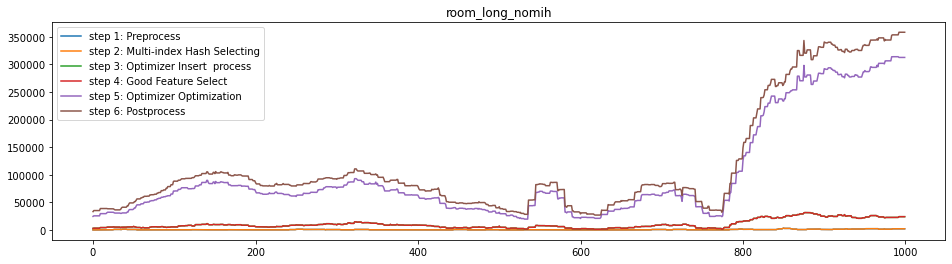

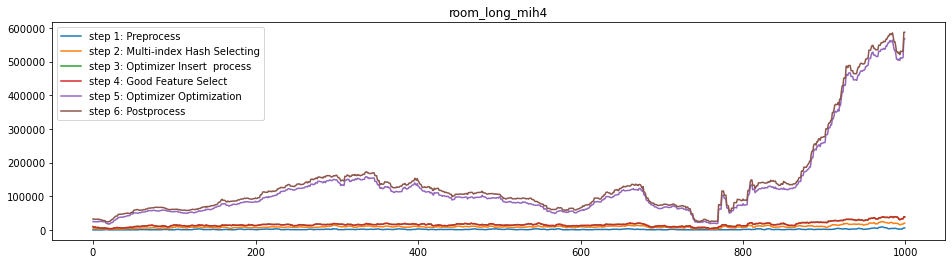

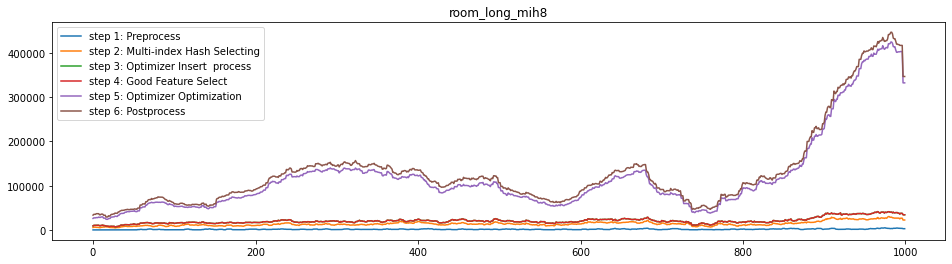

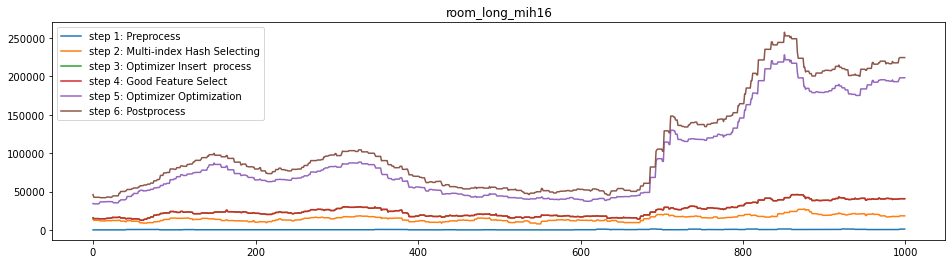

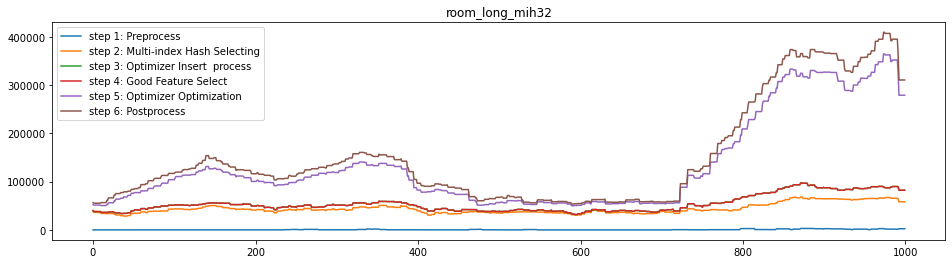

In [240]:
for key in multicount_name_dict.keys():
    name_list = multicount_name_dict[key]
    
    data_mean,name_lists = cal_mean(dataset_chosen_dir,name_list)
    
    plt.figure(figsize = (16,4))
    for i,data in enumerate(data_mean):
        plt.plot(data,label = name_lists[i])

    plt.title(dataset_name + "_" + key)    
    plt.legend()
    plt.show()

## MIH block test

In [26]:
#Change the dataset name here
dataset_tail = 'desk2'

dataset_name = dataset_head + "_" + dataset_tail

dataset_chosen_dir = test_path + dataset_name +"/"
res_names = os.listdir(dataset_chosen_dir)

In [27]:
block_names = sorted([name for name in res_names if 'csv' in name and 'block' in name and 'time' in name])

block_name_dict = {'blocksize10':[],'blocksize30':[],'blocksize50':[]}
mih_name_dict = {'mih4':copy.deepcopy(block_name_dict),'mih8':copy.deepcopy(block_name_dict)}

In [29]:
mih_name_dict

{'mih4': {'blocksize10': [], 'blocksize30': [], 'blocksize50': []},
 'mih8': {'blocksize10': [], 'blocksize30': [], 'blocksize50': []}}

In [30]:
for name in block_names:
    mih_name = name.split('_')[2]
    block_name = name.split('_')[3]
    mih_name_dict[mih_name][block_name] += [name]

In [32]:
mih_name_dict

{'mih4': {'blocksize10': ['RGBD_nogfs_mih4_blocksize10_0_time.csv',
   'RGBD_nogfs_mih4_blocksize10_1_time.csv',
   'RGBD_nogfs_mih4_blocksize10_2_time.csv',
   'RGBD_nogfs_mih4_blocksize10_3_time.csv',
   'RGBD_nogfs_mih4_blocksize10_4_time.csv',
   'RGBD_nogfs_mih4_blocksize10_5_time.csv',
   'RGBD_nogfs_mih4_blocksize10_6_time.csv'],
  'blocksize30': ['RGBD_nogfs_mih4_blocksize30_0_time.csv',
   'RGBD_nogfs_mih4_blocksize30_1_time.csv',
   'RGBD_nogfs_mih4_blocksize30_2_time.csv',
   'RGBD_nogfs_mih4_blocksize30_3_time.csv',
   'RGBD_nogfs_mih4_blocksize30_4_time.csv',
   'RGBD_nogfs_mih4_blocksize30_5_time.csv',
   'RGBD_nogfs_mih4_blocksize30_6_time.csv'],
  'blocksize50': ['RGBD_nogfs_mih4_blocksize50_0_time.csv',
   'RGBD_nogfs_mih4_blocksize50_1_time.csv',
   'RGBD_nogfs_mih4_blocksize50_2_time.csv',
   'RGBD_nogfs_mih4_blocksize50_3_time.csv',
   'RGBD_nogfs_mih4_blocksize50_4_time.csv',
   'RGBD_nogfs_mih4_blocksize50_5_time.csv']},
 'mih8': {'blocksize10': ['RGBD_nogfs_mih8_

In [454]:
plt.figure(figsize = (16,4))
for mih_key in mih_name_dict.keys():
    block_dict = mih_name_dict[mih_key]
    for block_key in block_dict.keys():
        block_name_list = block_dict[block_key]
        data_mean,name_lists = cal_mean(dataset_chosen_dir,block_name_list)
        plt.plot(data_mean[-1],label = mih_key + "_" + block_key)

plt.title(dataset_name + " with different blocksize")
plt.legend()
plt.savefig('test_pics/'+dataset_name+"_time_res_MIH.jpg")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'ORB_SLAM_TEST/room_long/RGBD_nogfs_mih4_blocksize10_9_time.csv'

<Figure size 1152x288 with 0 Axes>

In [143]:
plt.figure(figsize = (16,4))

for mih_key in mih_name_dict.keys():
    data_mean_list = []
    
    block_dict = mih_name_dict[mih_key]
    for block_key in block_dict.keys():
        block_name_list = block_dict[block_key]
        data_mean,name_lists = cal_mean(dataset_chosen_dir,block_name_list)
        data_mean_list += [data_mean]
        
    plt.plot(data_mean[-1],label = mih_key + "_" + block_key)

plt.title(dataset_name + " with different blocksize")
plt.legend()
plt.savefig('test_pics/'+dataset_name+"_time_res_MIH.jpg")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'ORB_SLAM_TEST/rgbd_dataset_freiburg1_plant/RGBD_nogfs_mih4_blocksize10_0_time.csv'

<Figure size 1152x288 with 0 Axes>

## All Results plot if needed

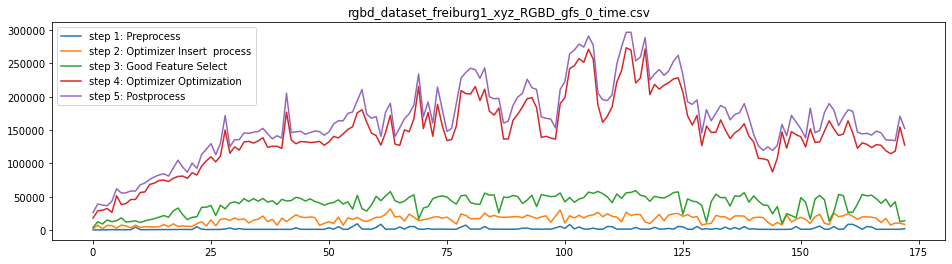

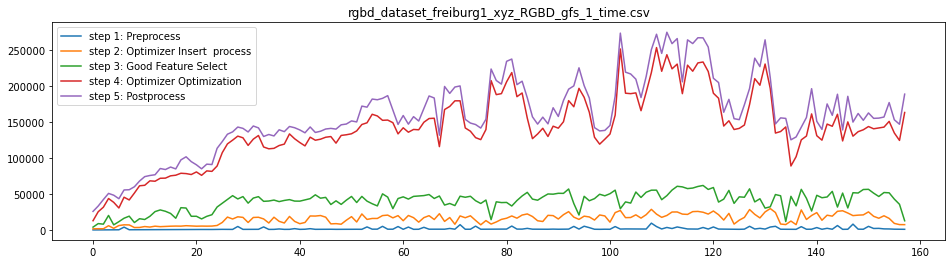

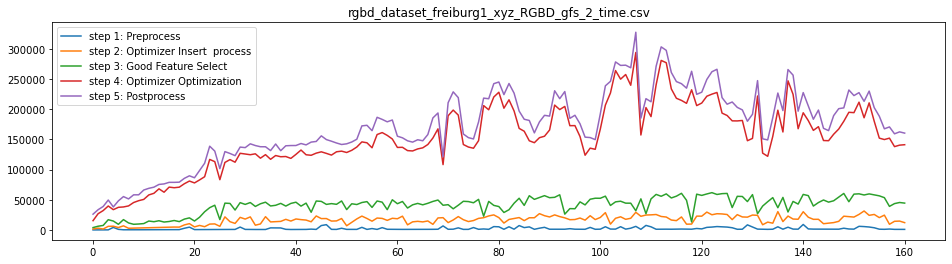

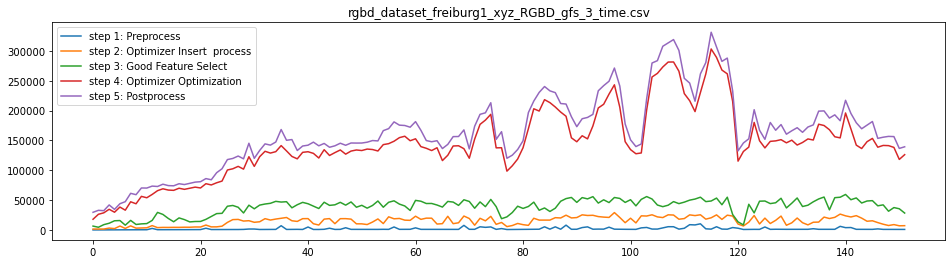

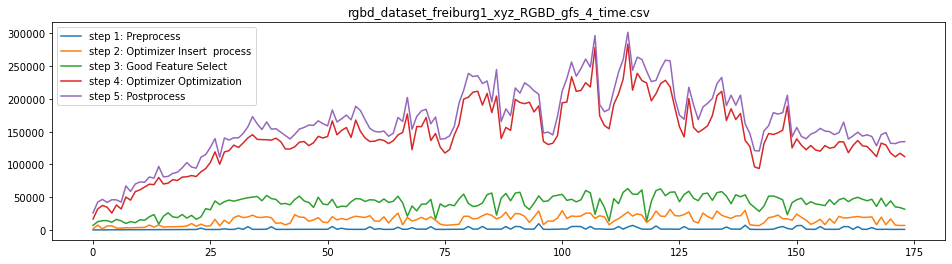

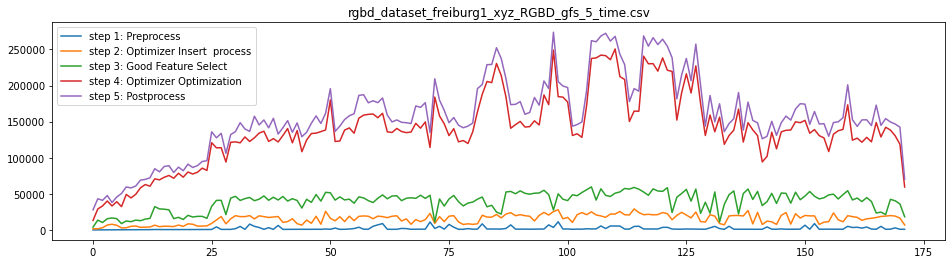

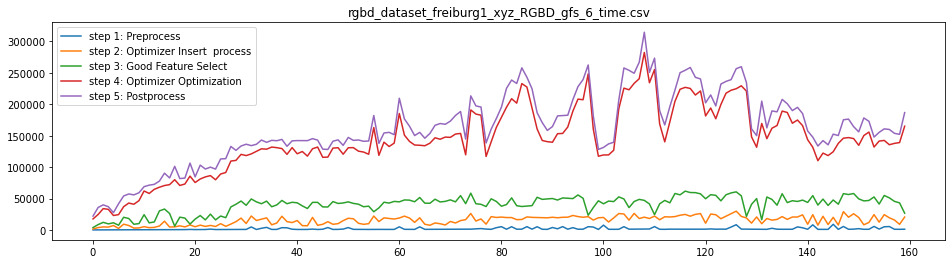

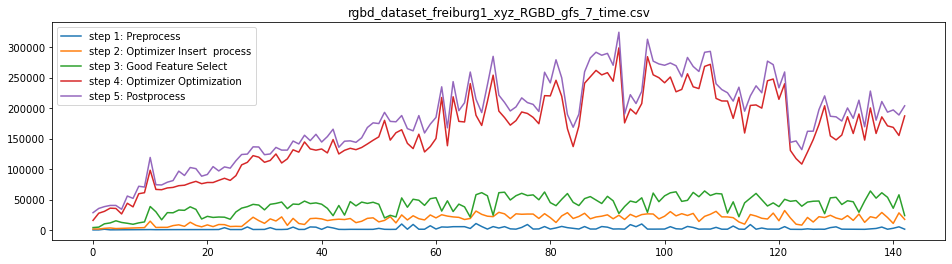

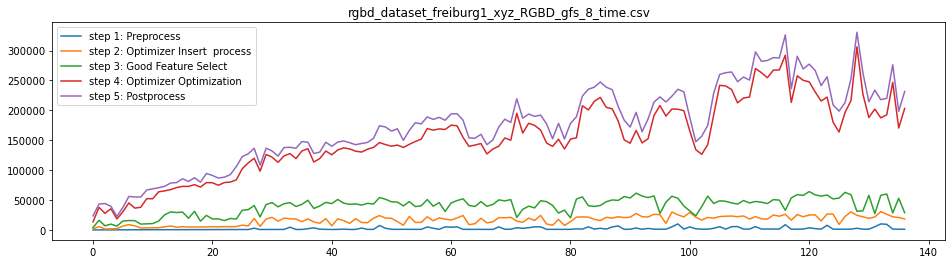

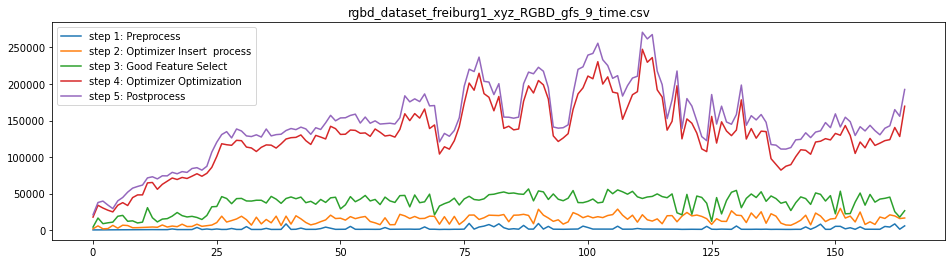

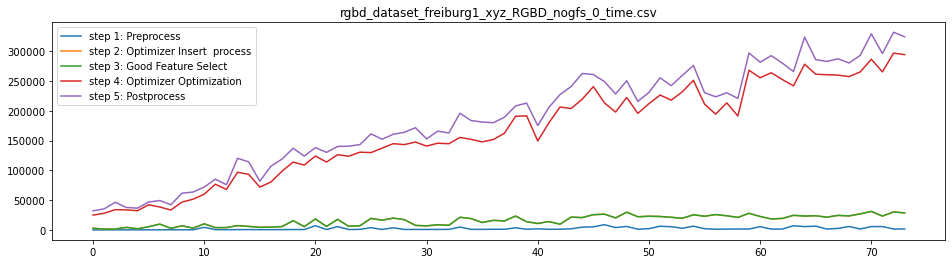

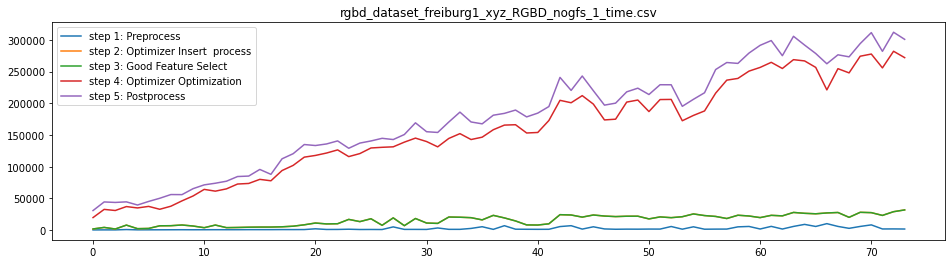

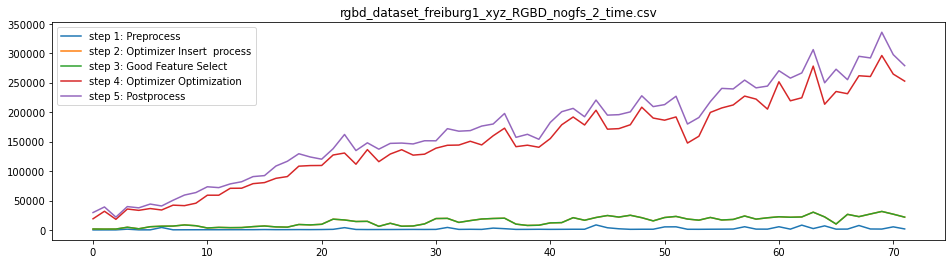

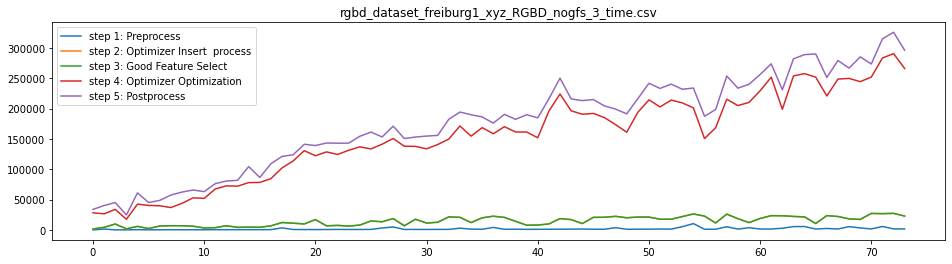

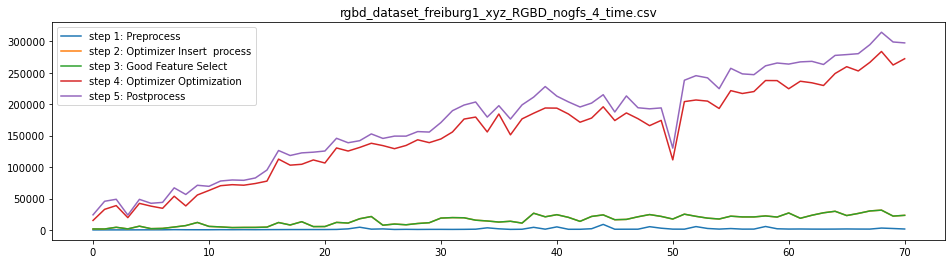

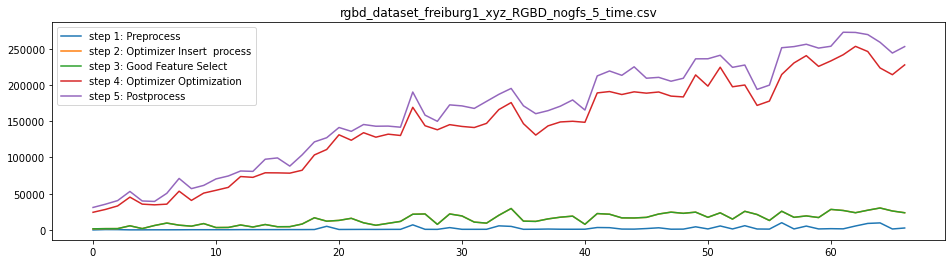

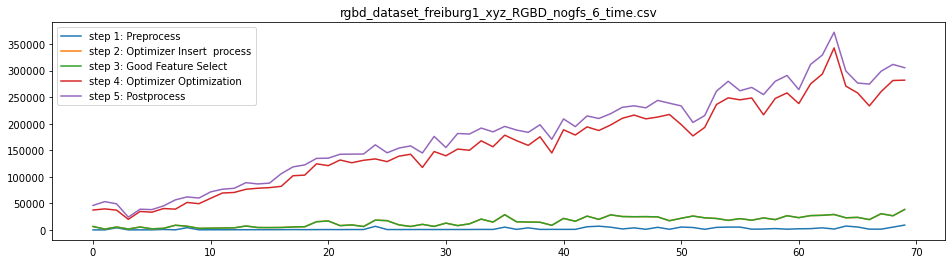

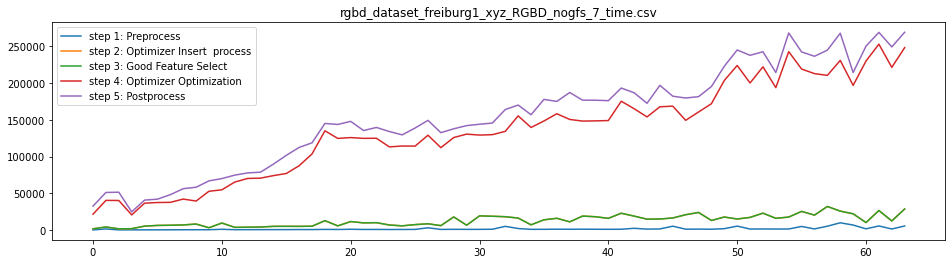

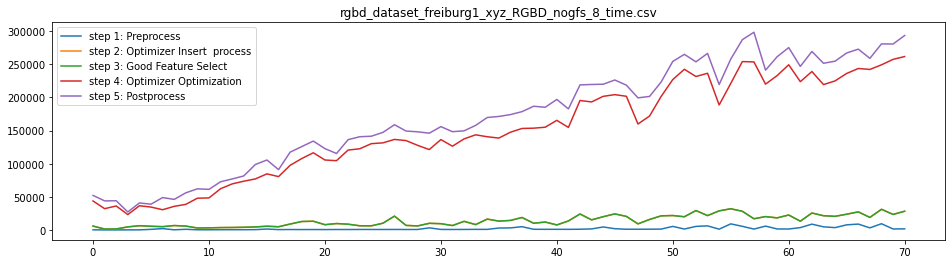

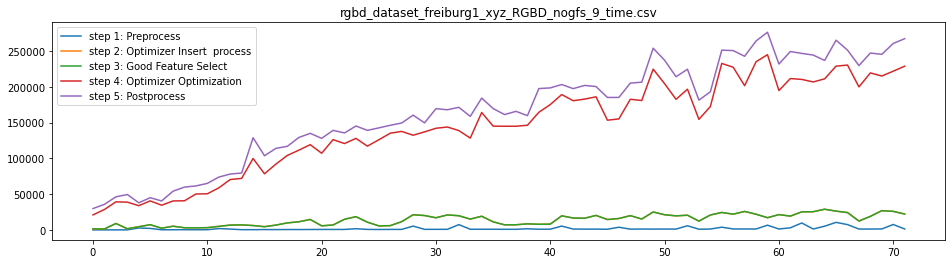

In [18]:
# Plot all figures for observations
for name in gfs_names + nogfs_names:
    orb_data = pd.read_csv(dataset_chosen_dir + name)

    name_lists = orb_data.columns

    plt.figure(figsize = (16,4))
    for i in range(orb_data.shape[1]):
        new_sum = orb_data.iloc[:,0].copy()
        for j in range(i):
            new_sum += orb_data.iloc[:,j+1]
        plt.plot(new_sum,label = name_lists[i])

    plt.title(dataset_name + "_" +name)
    plt.legend()
    plt.show()

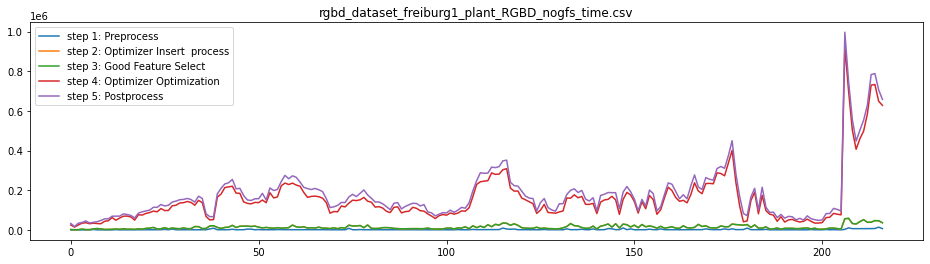

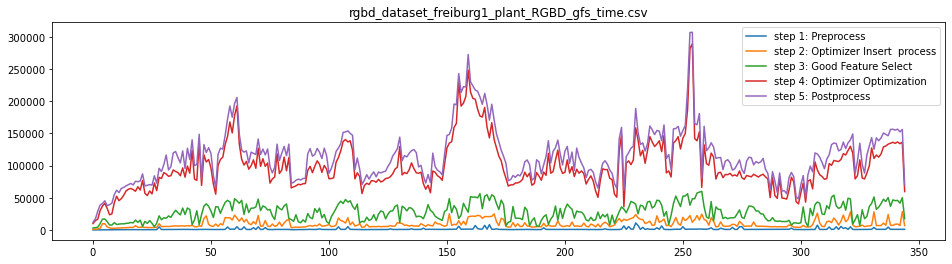

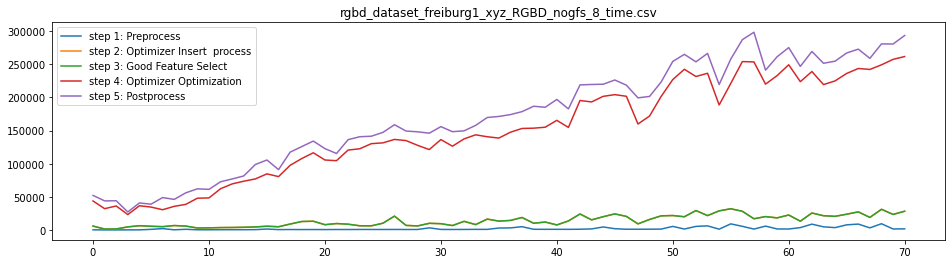

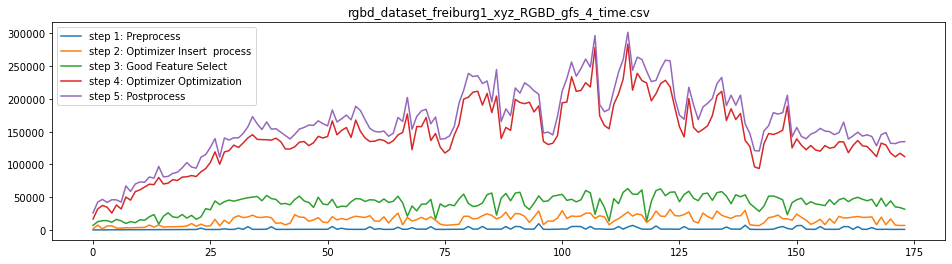

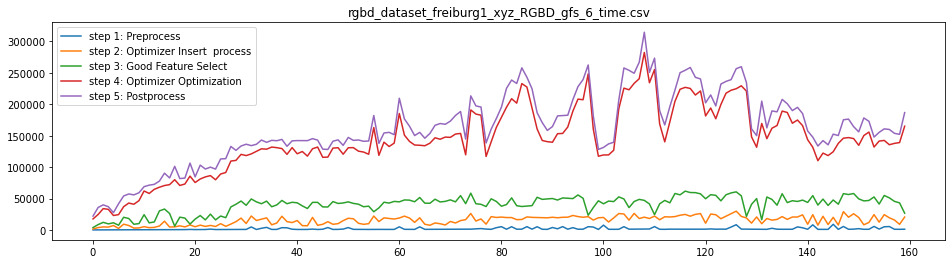

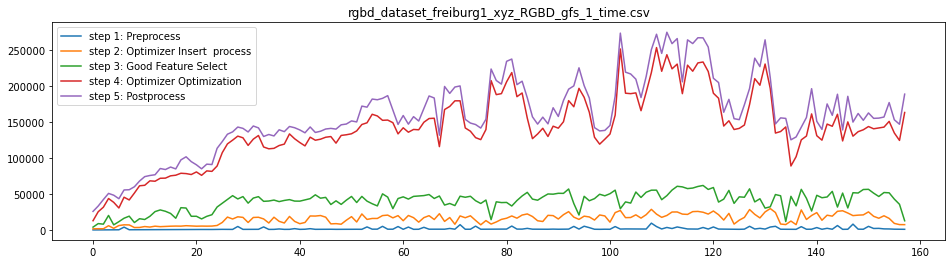

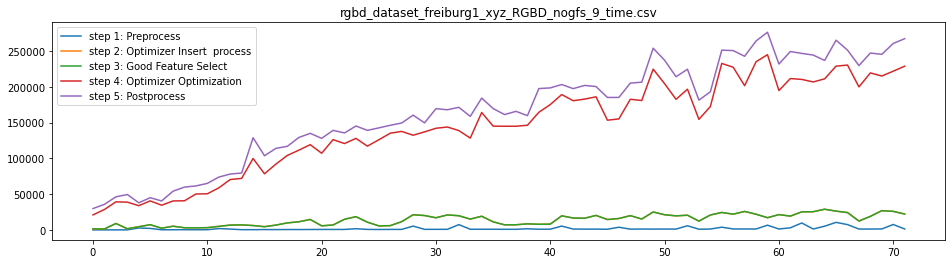

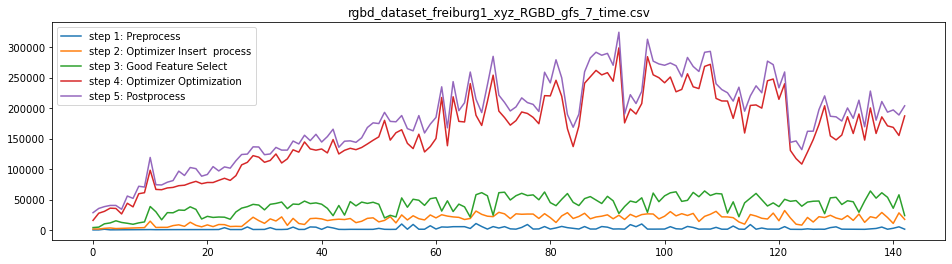

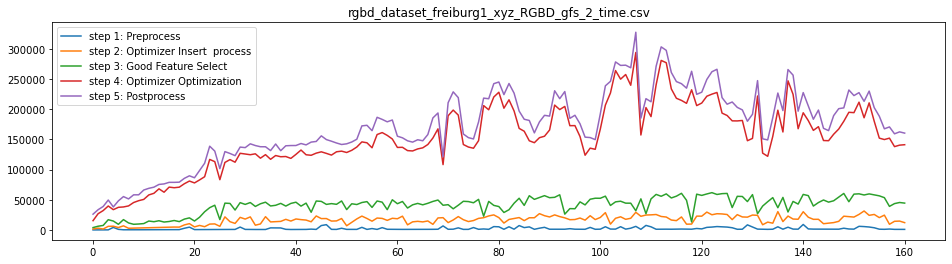

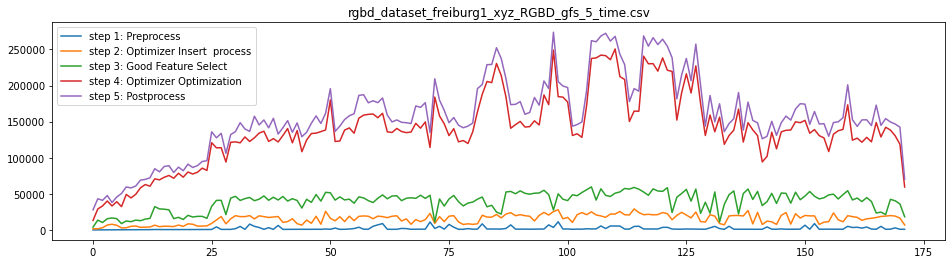

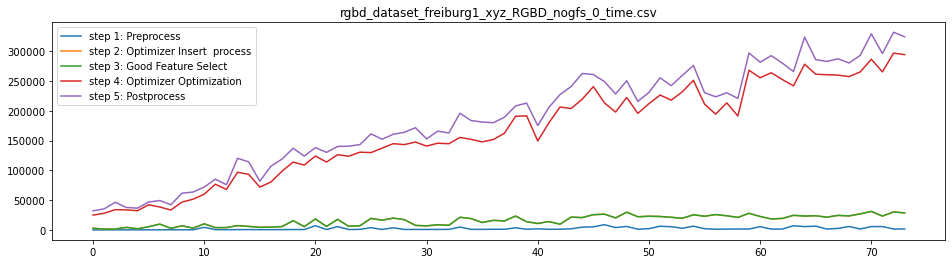

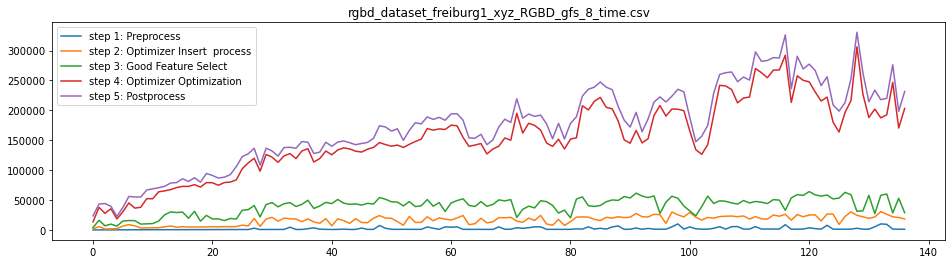

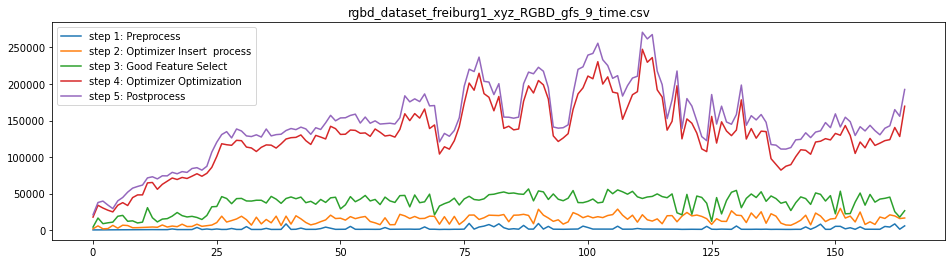

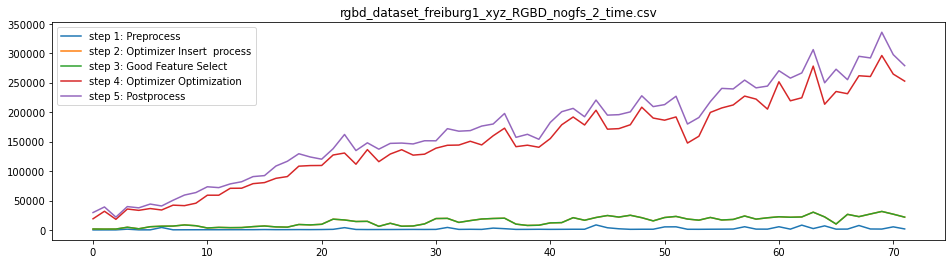

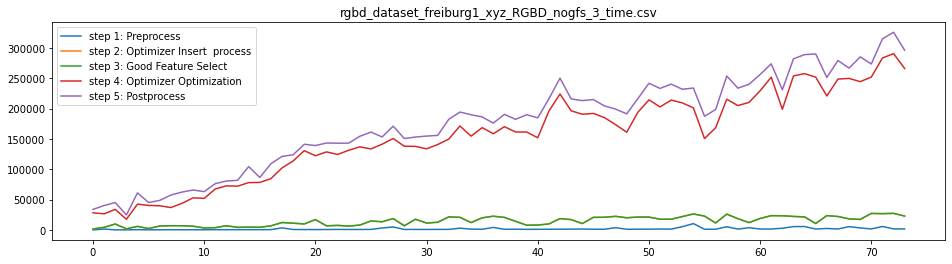

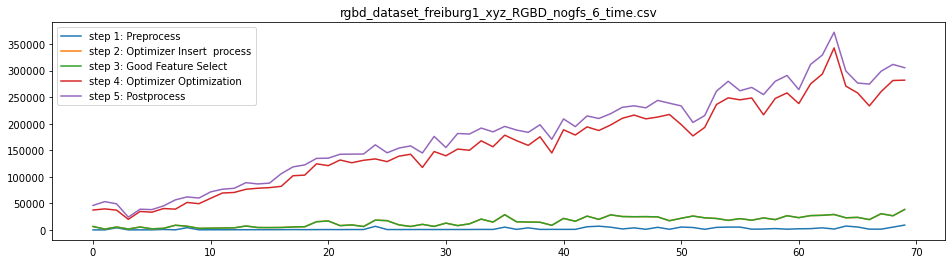

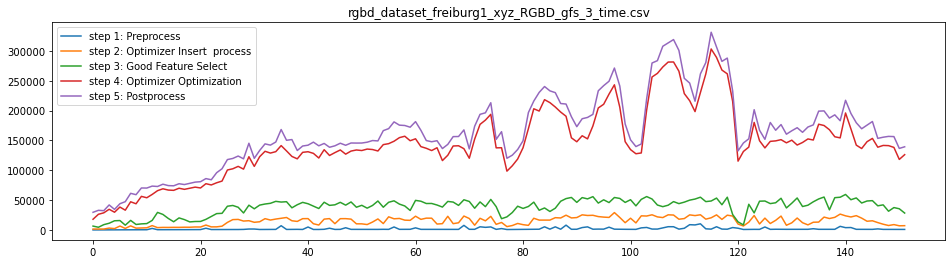

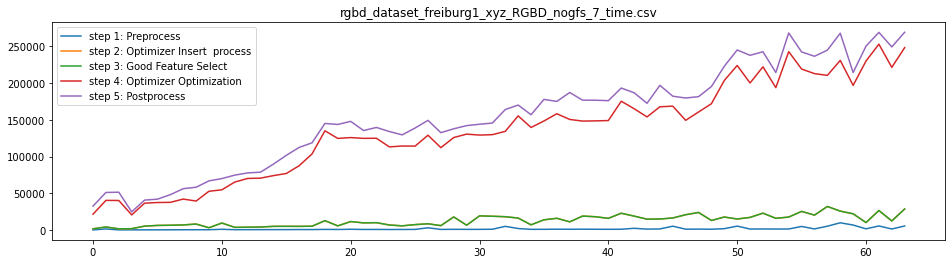

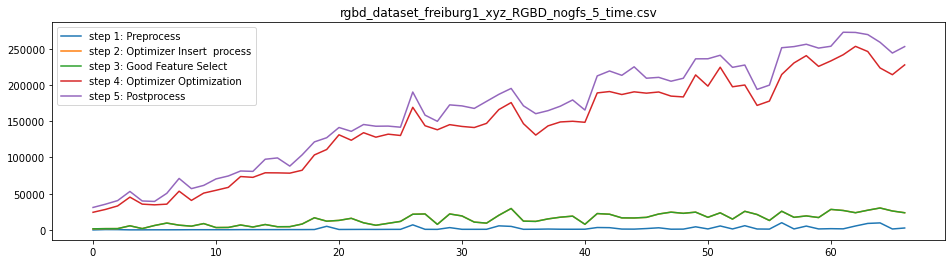

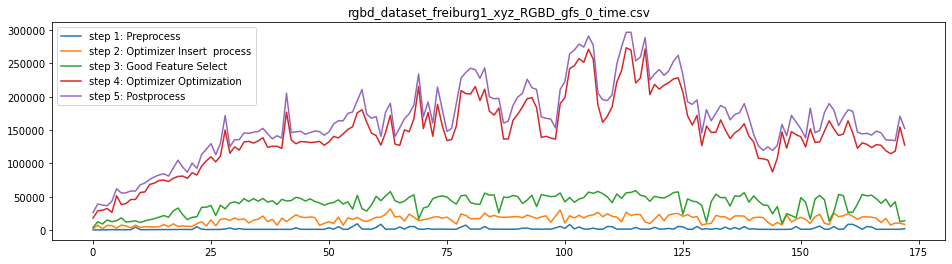

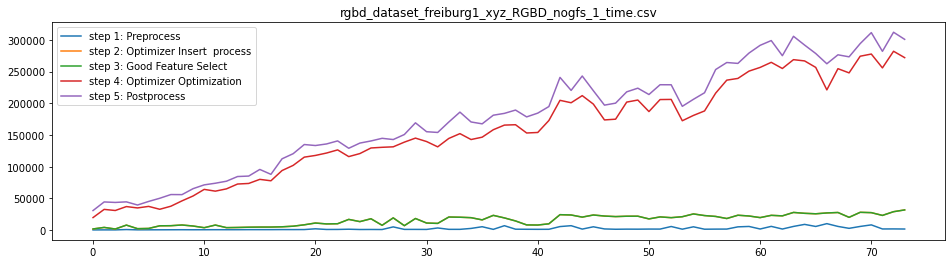

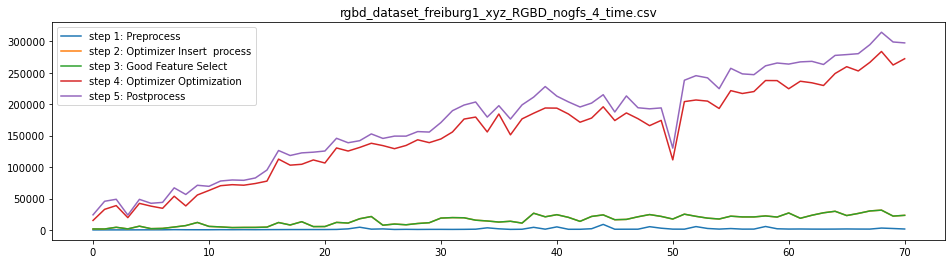

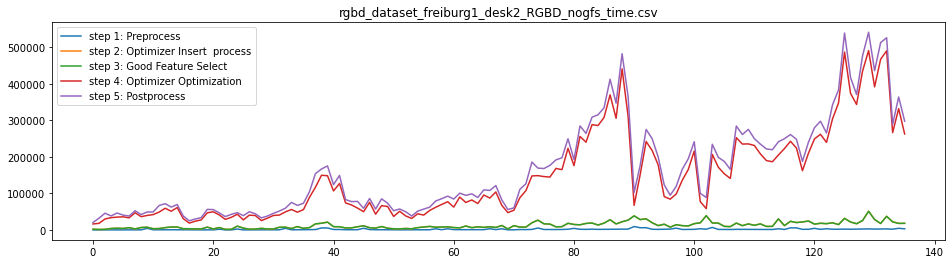

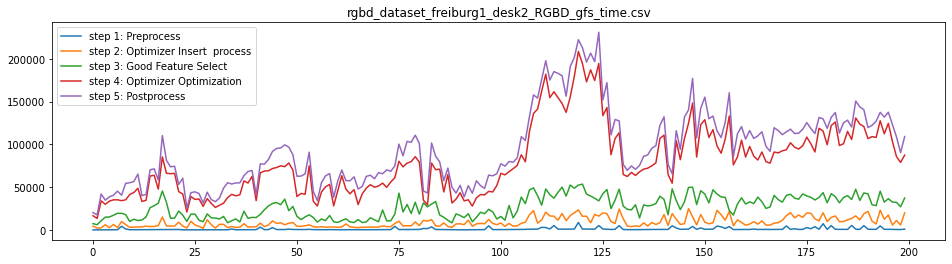

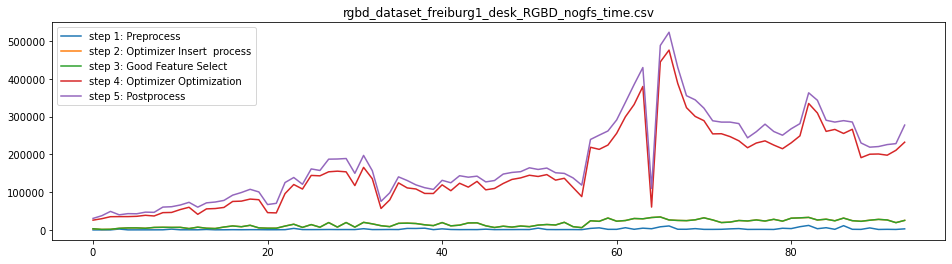

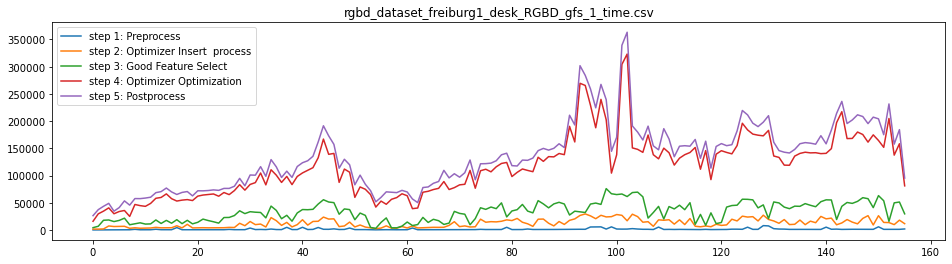

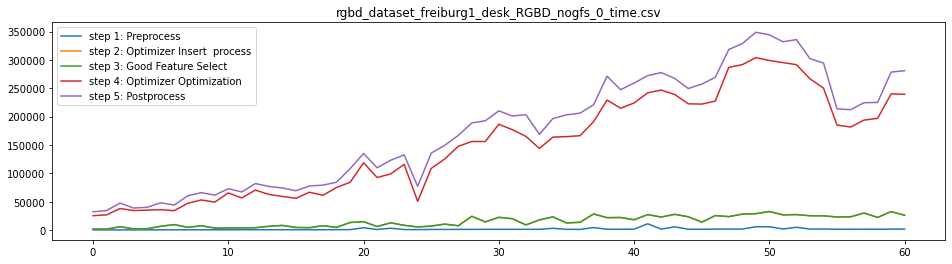

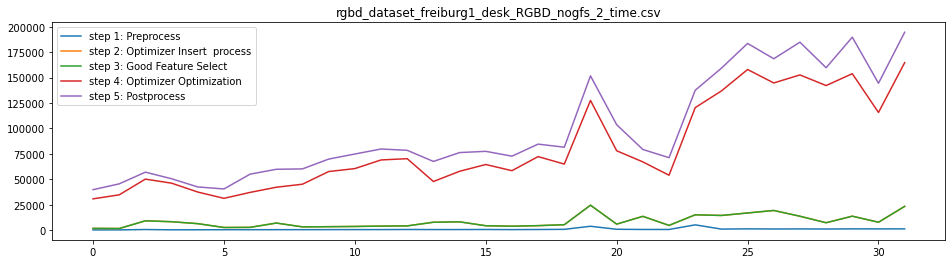

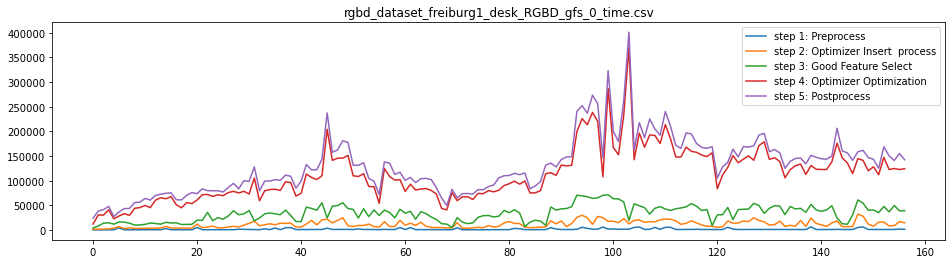

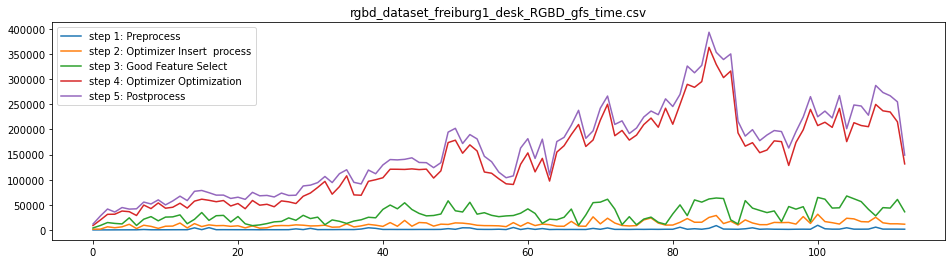

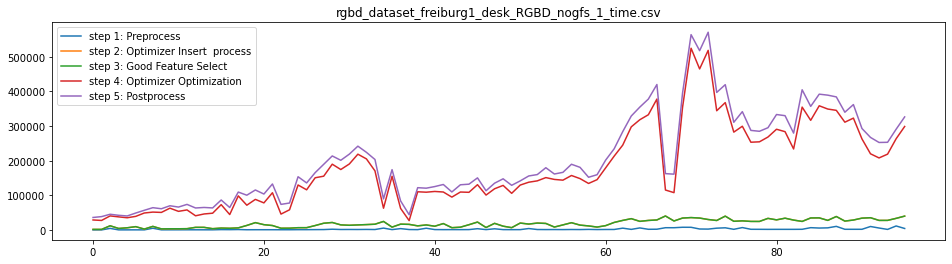

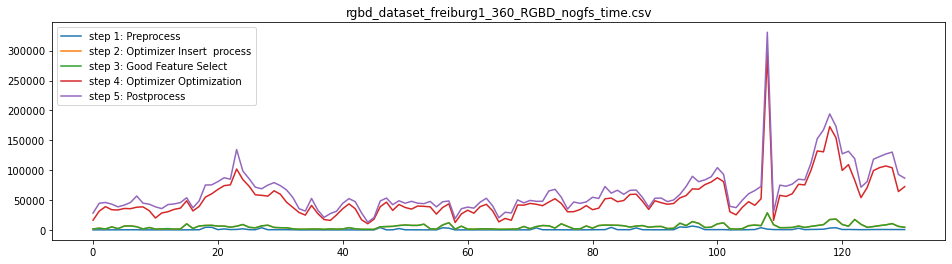

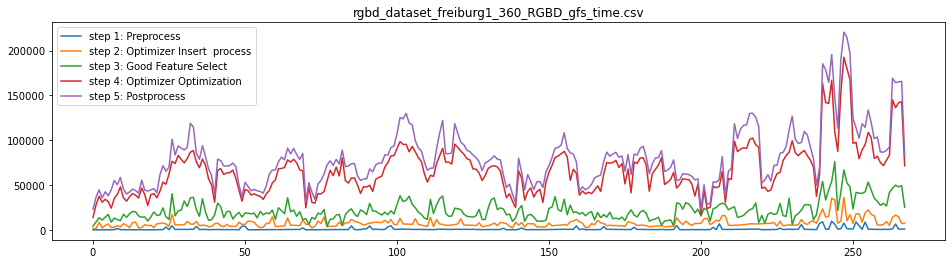

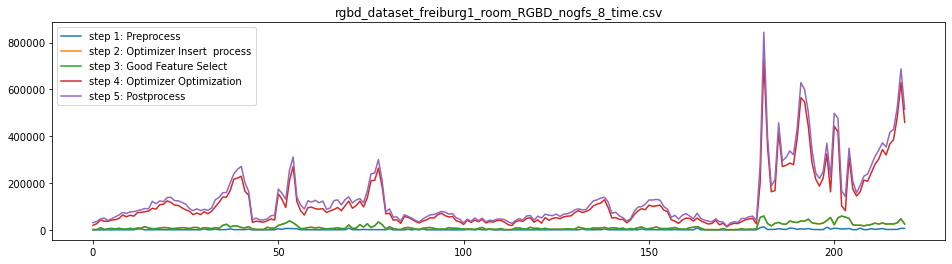

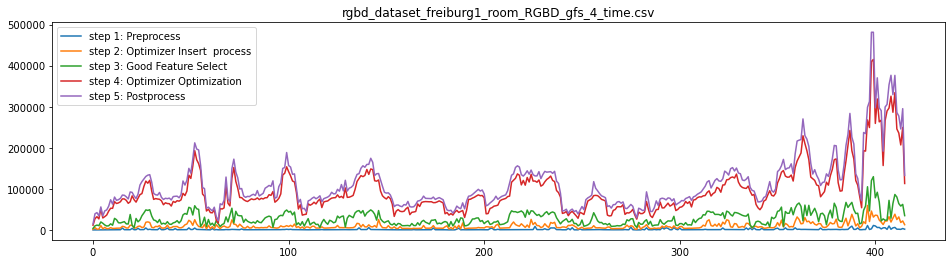

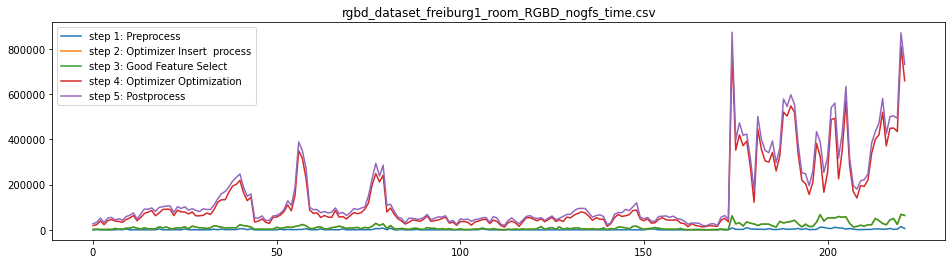

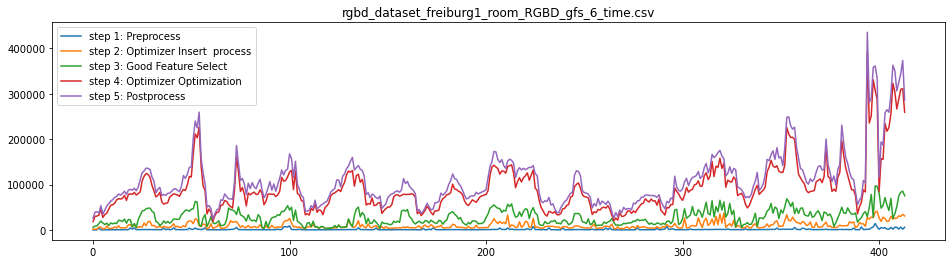

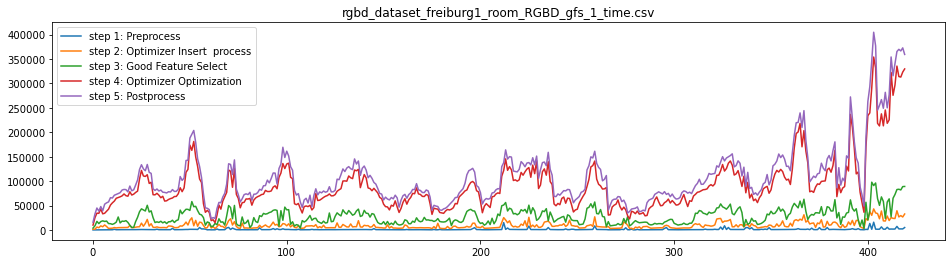

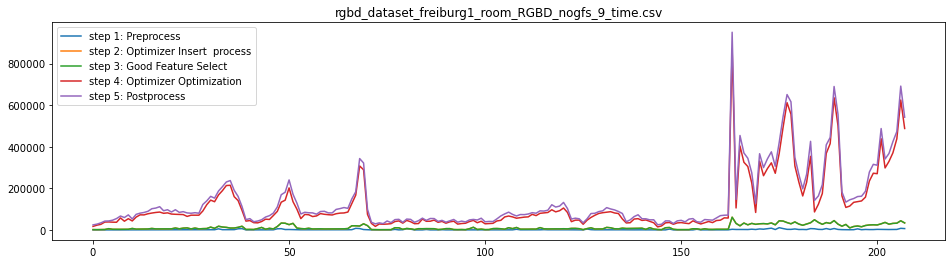

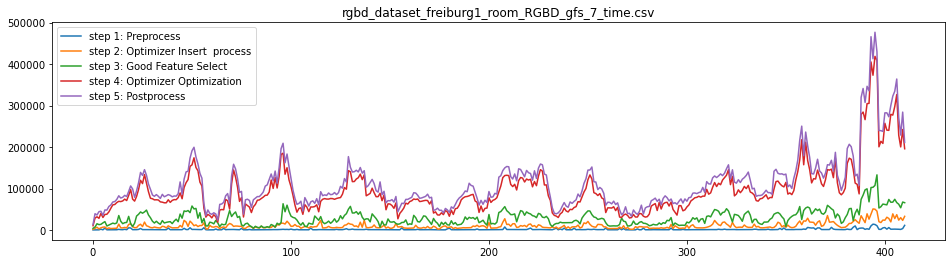

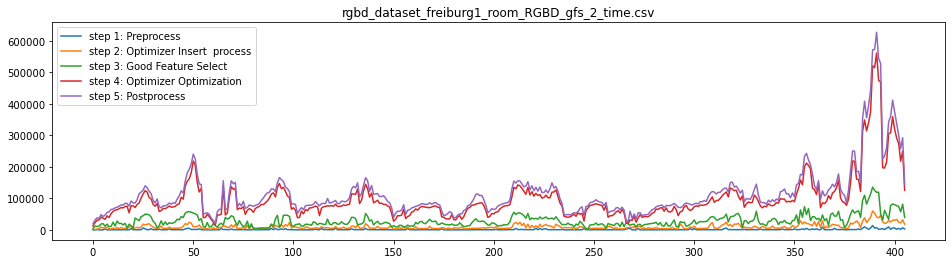

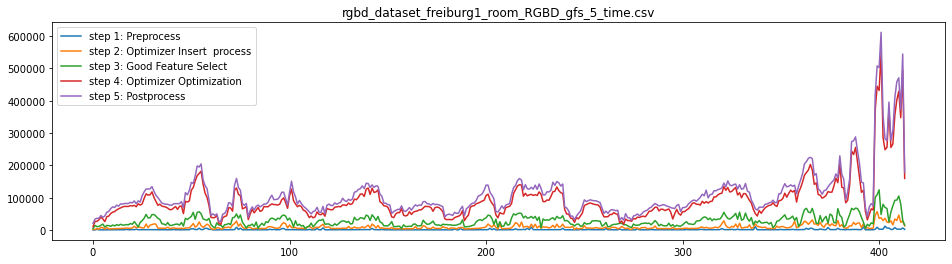

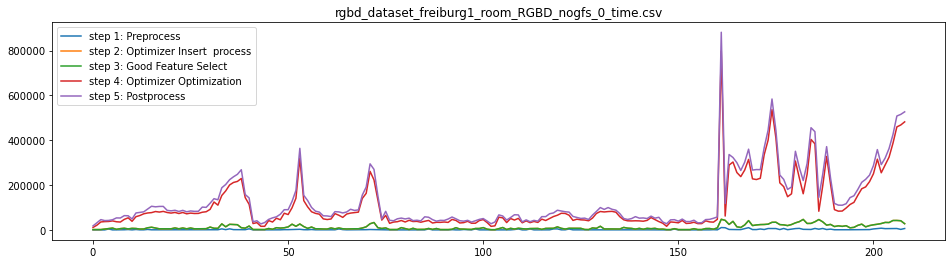

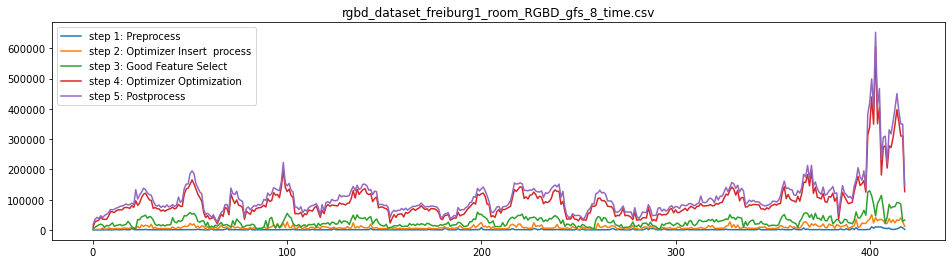

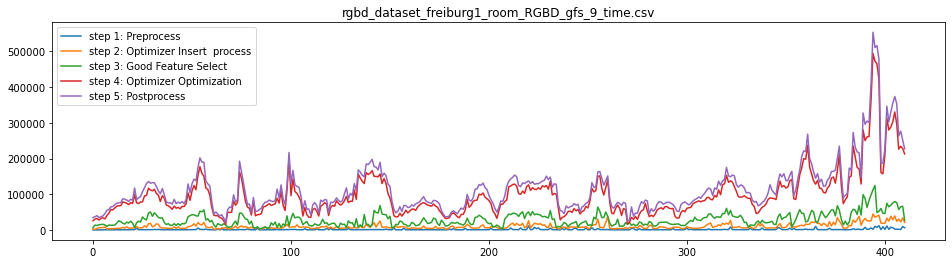

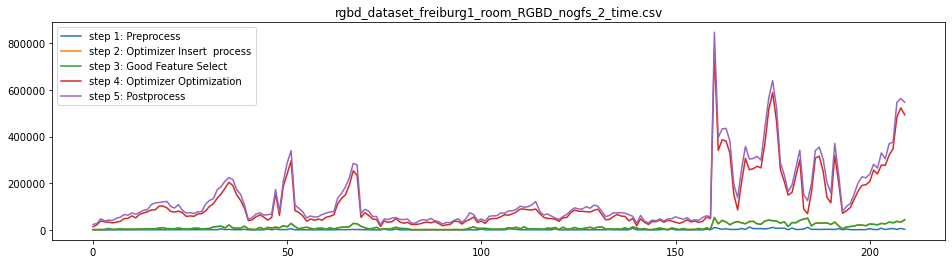

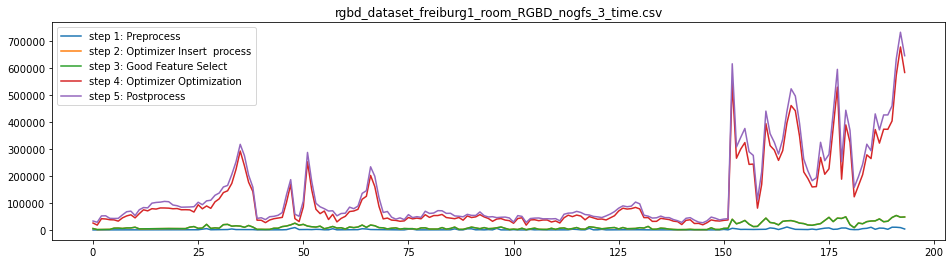

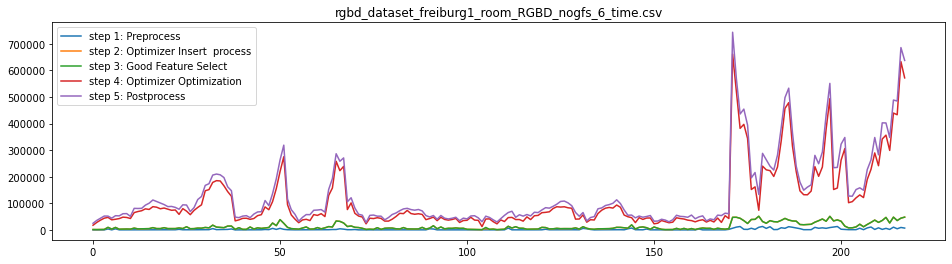

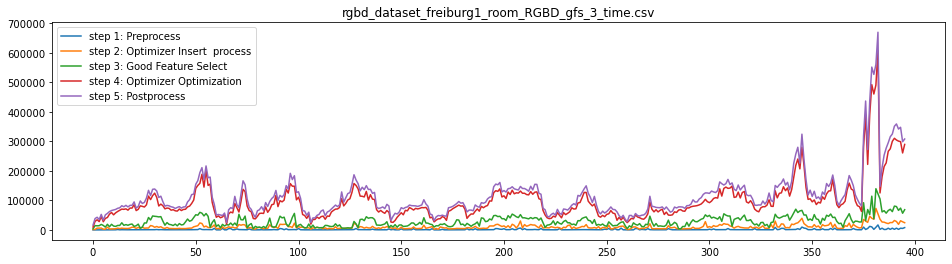

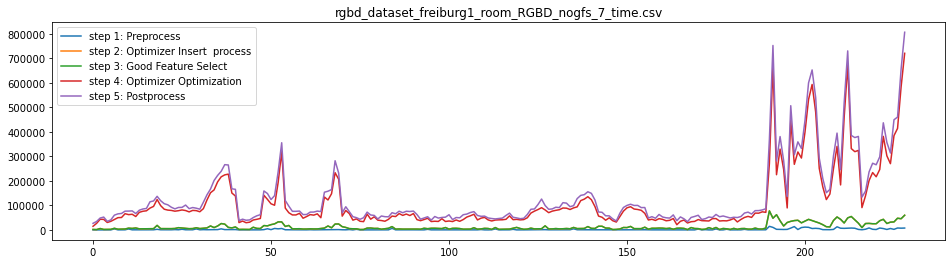

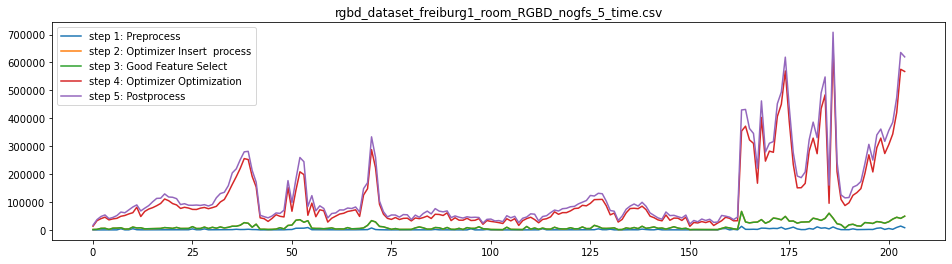

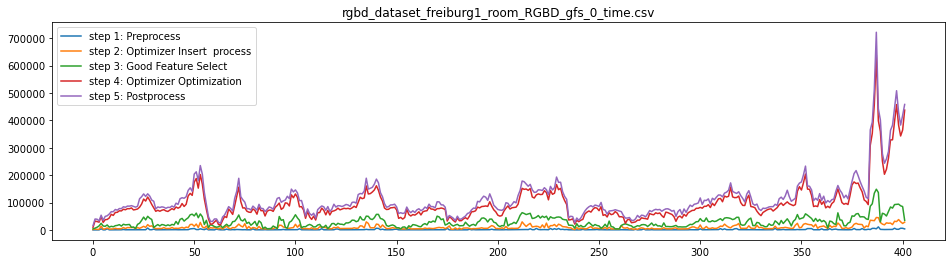

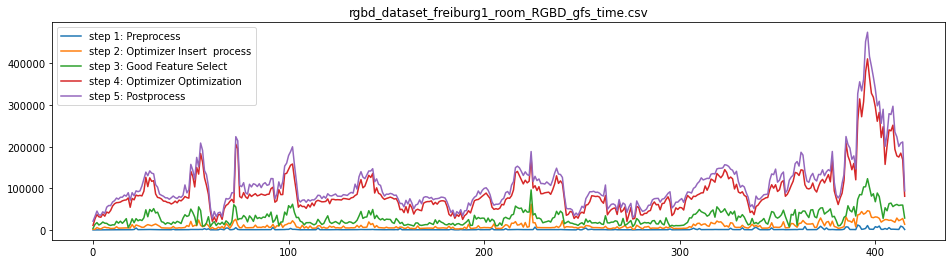

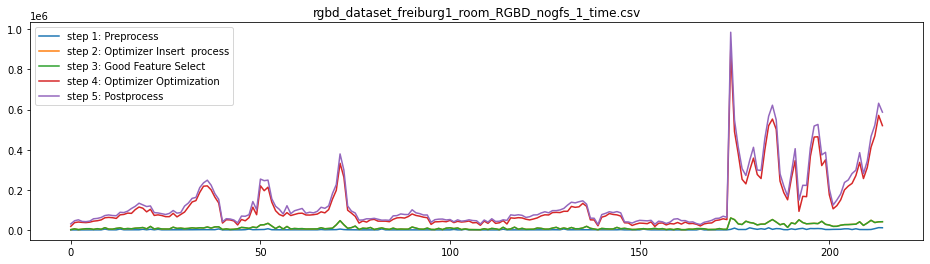

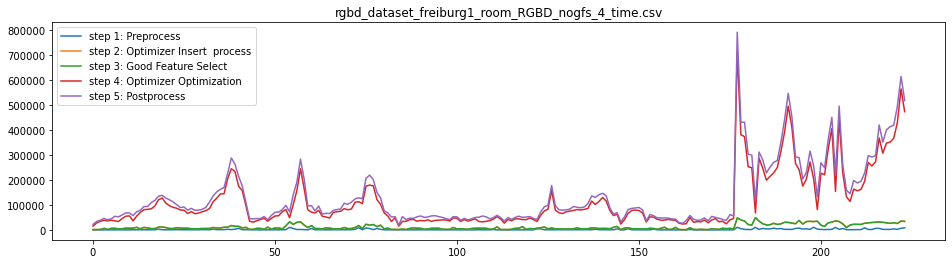

In [19]:
name_listfor m in range(len(files)):
    file_name = files[m]
    file_path = test_path + file_name + '/'
    
    res_names = os.listdir(file_path)
    res_names = [name for name in res_names if 'csv' in name]
    
    #print(res_names)
    
    for name in res_names:
        orb_data = pd.read_csv(file_path + name)
    
        name_lists = sorted(orb_data.columns)

        plt.figure(figsize = (16,4))
        for i in range(orb_data.shape[1]):
            new_sum = orb_data.iloc[:,0].copy()
            for j in range(i):
                new_sum += orb_data.iloc[:,j+1]
            plt.plot(new_sum,label = name_lists[i])

        plt.title(file_name + "_" +name)
        plt.legend()
        plt.show()
    